<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week04/Notebook_arboles_bosques.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# CARTs

## Predicting House Prices

Our objective today is to construct a model to predict house prices. From Rosen's landmark paper "Hedonic Prices and Implicit Markets: Product Differentiation in Pure Competition" (1974), we know that a vector of its characteristics describes a differentiated good.

In the case of a house, these characteristics may include structural attributes (e.g., number of bedrooms), neighborhood public services (e.g., local school quality), and local amenities (e.g., crime, air quality, etc). Thus, we can write the market price of the house as:

$$
Price=f(structural\,attributes,amenities,...)
$$


However, Rosen's theory doesn't tell us much about the functional form of $f$. 

## CARTS: Example

Let's load the packages:

In [1]:
# install.packages("pacman") #run this line if you use Google Colab

In [2]:
#packages
require("pacman")
p_load("tidyverse","ggplot2")

Loading required package: pacman



 And the toy data set:

In [3]:
db<-read.csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/toy_houses.csv')

In [4]:
head(db)

,price,habitaciones,DCBD
,<dbl>,<int>,<dbl>
1,162753.09,3,1.190307
2,73131.30,0,1.910839
3,162757.45,2,1.227716
4,73127.75,1,1.824990
5,73128.71,0,1.915576
6,98715.60,3,1.505208


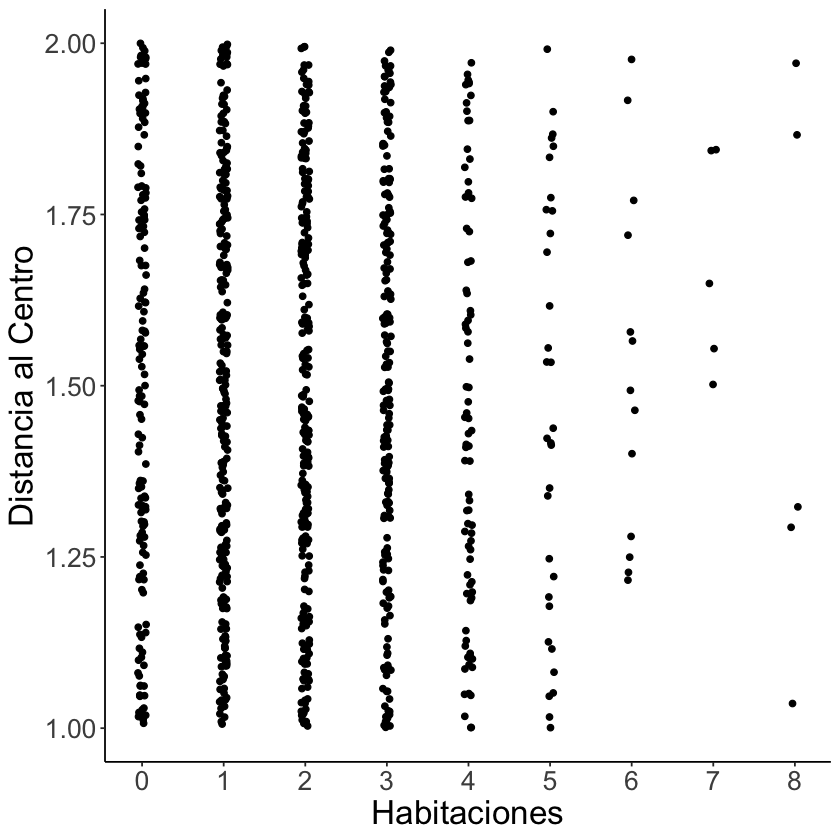

In [5]:
ggplot(db) +
  geom_point(aes(x=habitaciones,y=DCBD),position=position_jitter(width = .05)) +
  scale_x_continuous(breaks=seq(0,8,1)) +
  theme_classic() +
  xlab("Habitaciones") +
  ylab("Distancia al Centro") +
  theme(legend.position =  "none",
      text=element_text(size=20))

### Algorithm


-  Datos: $y_{n\times 1}$  y $X_{n\times k}$ 

-  Definiciones

      -  *j* es la variable que parte el espacio 
      - *s* es el punto de partición


-  Definimos los siguientes semiplanos

\begin{align}
R_1(j,s)=\{X|X_j\leq s\} \,\,\, \& \,\,\, R_2(j,s)=\{X|X_j > s\}
\end{align}

-  *El problema*: buscar la variable de partición $X_j$ y el punto $s$ de forma tal que 


\begin{align}
\underset{j,s}{min} \left[ \underset{y_{R_1}}{min}\sum_{x_i\in R_1(j,s)}(y-\gamma_{R_1})^2+ \underset{y_{R_2}}{min}\sum_{x_i\in R_2(j,s)}(y-\gamma_{R_2})^2\right]
\end{align}



#### Algorithm in R

Sin embargo, no construimos el árbol a mano, usamos el paquete `rpart`, que implementa el algoritmo de árboles de decisión para regresión y clasificación. Este paquete permite ajustar modelos de manera rápida y sencilla:

In [6]:
p_load("rpart")

In [7]:
mytree<-rpart(price~DCBD+habitaciones,data=db)

In [8]:
mytree

n= 1000 

node), split, n, deviance, yval
      * denotes terminal node

1) root 1000 1.716337e+12 123534.30  
  2) DCBD>=1.499274 483 6.982083e+10  81553.15  
    4) habitaciones< 2.5 324 3.060291e+03  73130.58 *
    5) habitaciones>=2.5 159 1.696944e+03  98716.14 *
  3) DCBD< 1.499274 517 4.730729e+03 162754.70 *

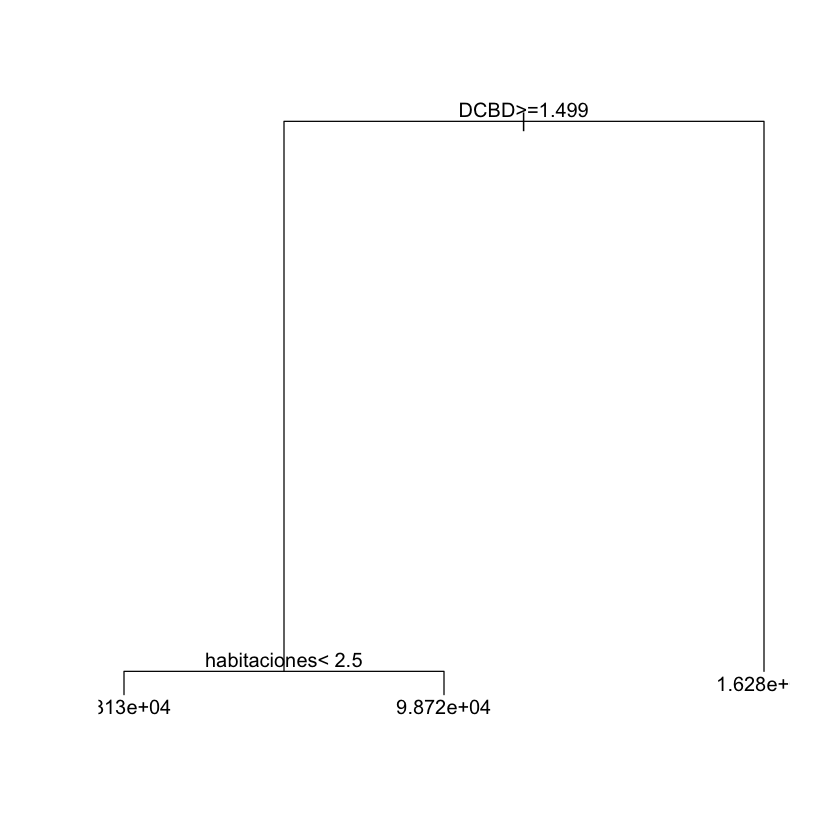

In [9]:
plot(mytree)
text(mytree)

Para visualizar árboles de decisión de forma mas "bonita", podemos usar el paquete `rpart.plot`, que extiende las capacidades de rpart con funciones gráficas más potentes y estéticas. La función principal es `prp()` qye permite crear gráficos detallados del árbol entrenado. En el siguiente ejemplo, usamos varias opciones para mejorar la presentación del árbol:

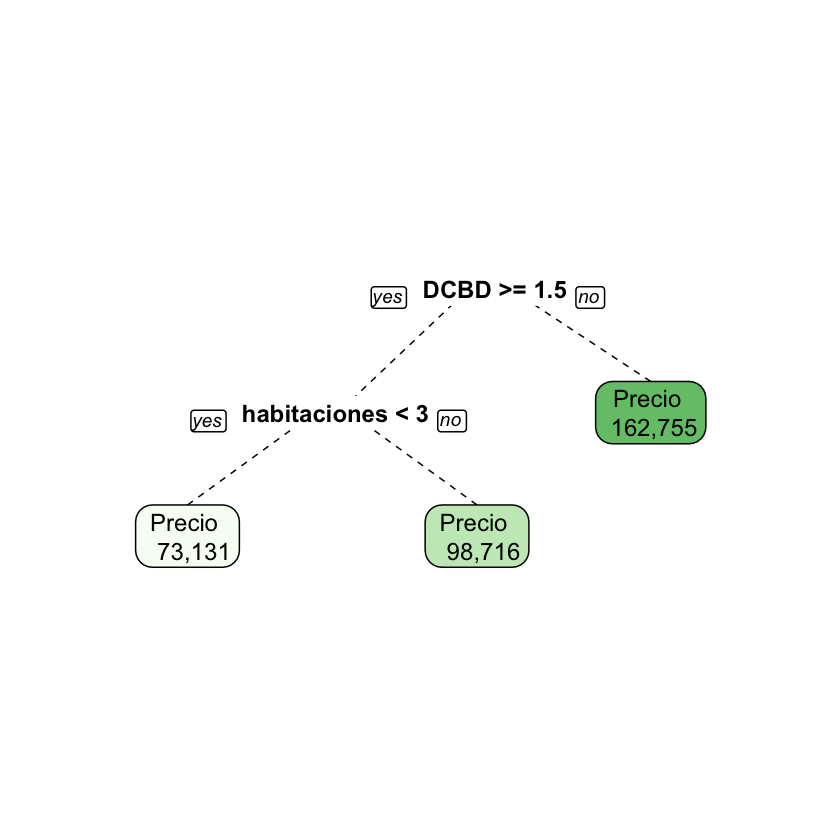

In [10]:
p_load("rpart.plot")

prp(mytree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=TRUE,ycompress = TRUE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(mytree$frame$yval, 0), nsmall=0, big.mark=",")))

Recordemos que la forma general del arbol es
$$
f(x_{i};\{R_{j},\gamma_{j}\}_{1}^{J})=\sum_{j=1}^{J}\gamma_{j}I(x\in R_{j})
$$

Entonces en este caso, el precio predicho por el  árbol es 

\begin{align}
\hat{Precio} = 162,754.67 I(DCBD<1.5) + 98,716.14 I(DCBD>=1.5 \& habitaciones>=3) + 73,130.58 I(DCBD>=1.5 \& habitaciones<3) 
\end{align}


##### With Ames Data Set

### Ames Data Set

Este conjunto de datos contiene información detallada sobre las características de viviendas en Ames, Iowa, y su precio de venta. Incluye más de 80 variables que describen aspectos físicos, de ubicación y de calidad de las propiedades, como el tamaño habitable, el tipo de edificio, el año de construcción, el número de baños, y si tiene garaje o cercado, entre otros.

Es ampliamente utilizado en ciencia de datos y machine learning como un caso realista para problemas de regresión.  
La descripción completa de las variables puede consultarse aquí:  
https://jse.amstat.org/v19n3/decock/DataDocumentation.txt



In [11]:
p_load("modeldata")

data("ames", package = "modeldata")

ames<-ames  %>% filter(Neighborhood %in%c("North_Ames", "College_Creek", "Old_Town", "Edwards", "Somerset", "Northridge_Heights", "Gilbert", "Sawyer", "Northwest_Ames", "Sawyer_West"))


In [12]:
head(ames)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


In [13]:
class(ames$Fence)

[1] "factor"

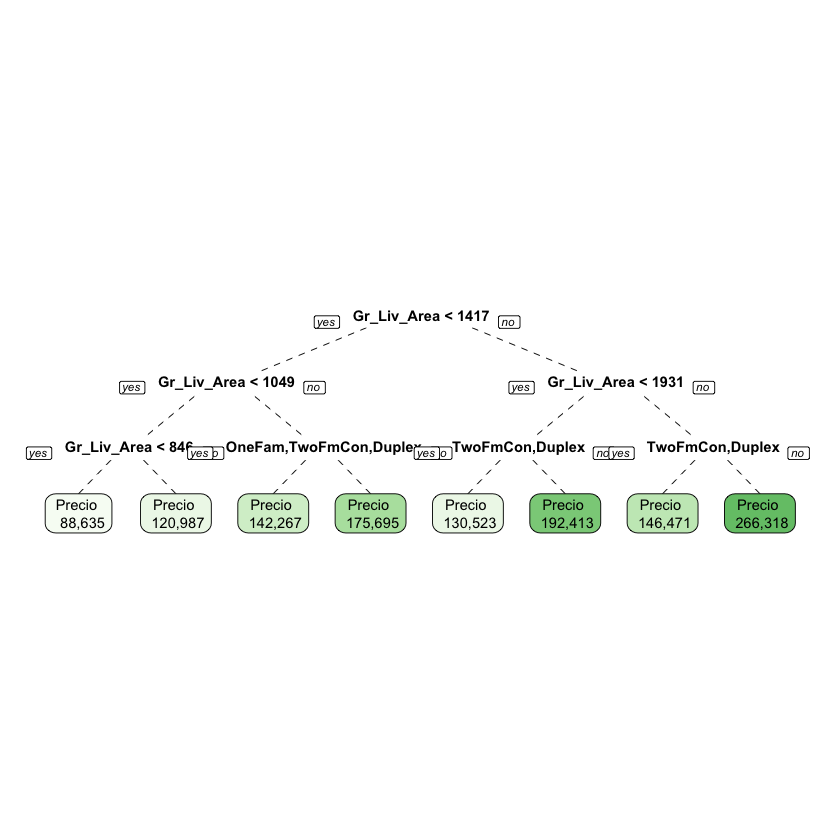

In [14]:
amestree<-rpart(log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,data=ames, control = list(maxdepth = 3))

p_load("rpart.plot")
prp(amestree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(amestree$frame$yval), 0), nsmall=0, big.mark=",")))

### Sobreajuste

<div >
<img src = "figures/tree_uba.png" width="300"/>
</div>

In [15]:
amestree<-rpart(log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,data=ames,cp=.1)

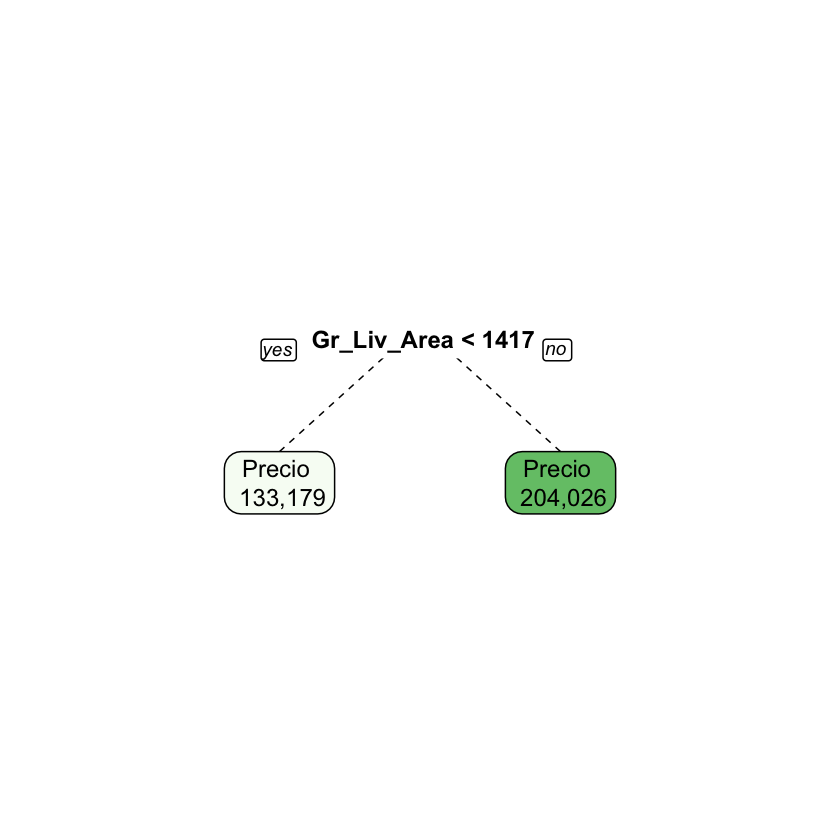

In [16]:
p_load("rpart.plot")
prp(amestree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(amestree$frame$yval), 0), nsmall=0, big.mark=",")))


- Fijar la profundidad del árbol. (implementado en Caret `method=rpart2`)

- Fijar la mínima cantidad de datos que están contenidos dentro de cada hoja. 

- Cost complexity pruning (implementado en Caret con `method=rpart`)

- `tidymodels` implementa todos

##### Implementación con Caret

In [17]:
p_load("caret")

In [18]:
fitControl<-trainControl(method ="cv",
                         number=5)

#####  `method=rpart2`  allows to tune Max Tree Depth

In [19]:
set.seed(123)
tree_rpart2 <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart2",
    trControl = fitControl,
    tuneGrid = expand.grid(maxdepth = seq(1,30,1))
)

In [20]:
tree_rpart2

CART 

2063 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1651, 1651, 1650, 1651, 1649 
Resampling results across tuning parameters:

  maxdepth  RMSE       Rsquared   MAE      
   1        0.3076130  0.3221351  0.2299792
   2        0.2920483  0.3896141  0.2152181
   3        0.2832392  0.4266327  0.2095505
   4        0.2790818  0.4431936  0.2081170
   5        0.2740480  0.4630493  0.2036835
   6        0.2697981  0.4801112  0.2008007
   7        0.2673430  0.4891130  0.1988199
   8        0.2670243  0.4906269  0.1984846
   9        0.2670880  0.4907169  0.1984789
  10        0.2670880  0.4907169  0.1984789
  11        0.2670880  0.4907169  0.1984789
  12        0.2670880  0.4907169  0.1984789
  13        0.2670880  0.4907169  0.1984789
  14        0.2670880  0.4907169  0.1984789
  15        0.2670880  0.4907169  0.1984789
  16        0.2670880  0.4907169  0.1984789
  17        0.2670880  0.4907169  0.1984789
  18        0.2

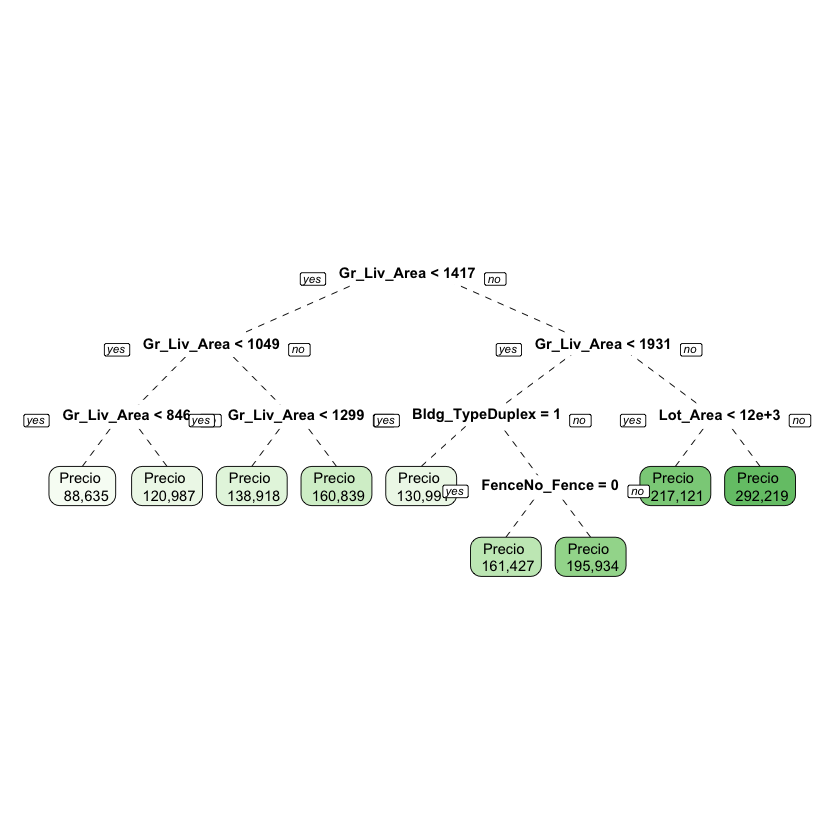

In [21]:
prp(tree_rpart2$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_rpart2$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

##### Tidymodels

In [22]:
p_load("tidymodels")

# Model setting
tree_model_tune_params <- decision_tree(tree_depth = tune(),
                                        min_n      = tune()) %>% 
  set_engine("rpart") %>% 
  set_mode("regression") 



# Receipe
rec_1 <- recipe(Sale_Price ~  Gr_Liv_Area  + Bldg_Type  + Fence ,data=ames)  %>% 
         step_log(Sale_Price)


# Folds
set.seed(234)
ames_folds <- vfold_cv(ames,
              v       = 5
             )

In [23]:
14*99

[1] 1386

In [24]:
# workflow
tree_wf <- workflow() %>%
                     add_recipe(rec_1) %>%
                     add_model(tree_model_tune_params)

tree_grid <- grid_regular( # Rango de búsqueda para cada hiperparámetro
                  tree_depth(range = c(1, 15), trans = NULL),
                  min_n(range = c(2, 100), trans = NULL),
                 levels=c(14,99))  

tree_grid


tree_depth,min_n
<int>,<int>
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [25]:
dim(tree_grid)

[1] 1386    2

<div >
<img src = "figures/gridsearch.png" />
</div>

In [26]:
tree_grid_Random <- grid_random( # Rango de búsqueda para cada hiperparámetro
                  tree_depth(range = c(1, 15), trans = NULL),
                  min_n(range = c(2, 100), trans = NULL),
                  # Número valores por hiperparámetro
                  size = 25) 

tree_grid_Random

tree_depth,min_n
<int>,<int>
5,21
13,65
1,10
9,18
3,69
14,17
14,16
6,74
6,65


In [27]:
#train

tree_res <- 
  tree_wf %>% 
  tune_grid(
    resamples = ames_folds,
    grid = tree_grid_Random,
    metrics= metric_set( mae)      
    )



In [28]:
tree_res %>% 
  collect_metrics(summarize = TRUE)

tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,21,mae,standard,0.1910637,5,0.002747537,Preprocessor1_Model01
13,65,mae,standard,0.1918292,5,0.003298625,Preprocessor1_Model02
1,10,mae,standard,0.2308395,5,0.004611652,Preprocessor1_Model03
9,18,mae,standard,0.1910637,5,0.002747537,Preprocessor1_Model04
3,69,mae,standard,0.1983294,5,0.002499310,Preprocessor1_Model05
14,17,mae,standard,0.1910637,5,0.002747537,Preprocessor1_Model06
14,16,mae,standard,0.1910637,5,0.002747537,Preprocessor1_Model07
6,74,mae,standard,0.1933229,5,0.002953668,Preprocessor1_Model08
6,65,mae,standard,0.1918292,5,0.003298625,Preprocessor1_Model09


In [29]:
best_tree <- tree_res %>% select_best(metric="mae")

In [30]:
final_wf <- 
  tree_wf %>% 
  finalize_workflow(best_tree)

final_wf

== Workflow ====================================================================
Preprocessor: Recipe
Model: decision_tree()

-- Preprocessor ----------------------------------------------------------------
1 Recipe Step

* step_log()

-- Model -----------------------------------------------------------------------
Decision Tree Model Specification (regression)

Main Arguments:
  tree_depth = 6
  min_n = 56

Computational engine: rpart 


#### Cost complexity Prunning


Cost complexity del árbol  $T$ con $[T]$ nodos terminales del árbol 
\begin{align}
  C_{\alpha}(T)= \sum_{m=1}^{[T]}  \sum_{x_i\in R_m} (y_i-\hat{y}_m)^2 + \alpha [T]
\end{align}


Objetivo: para un dado $\alpha$, encontrar el pruning óptimo que minimice  $C_{\alpha}(T)$

Se logra eliminando sucesivamente las ramas que producen un aumento mínimo en $\sum_{x_i\in R_m} (y_i-\hat{y}_m)^2 $


##### Algoritmo completo

  - Hacemos crecer el árbol

  - Para un dado $\alpha$, aplicamos  *cost complexity pruning* 
    
  - Utilizamos K-fold cross-validation para elegir $\alpha$. 

  
Tenemos entonces una secuencia de subarboles para distintos valores de $\alpha$ 

Elegimos el $\alpha$ y el subárbol que tienen el menor error de predicción.

#####  `method=rpart`  only allows to tune Complexity Parameter

- Can change the length


In [31]:
set.seed(123)
tree_lenght <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart",
    metric="MAE",
    trControl = fitControl,
    tuneLength=100
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


In [32]:
tree_lenght

CART 

2063 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1651, 1651, 1650, 1651, 1649 
Resampling results across tuning parameters:

  cp            RMSE       Rsquared   MAE      
  0.0001829893  0.2597482  0.5279496  0.1901113
  0.0001835106  0.2597482  0.5279496  0.1901113
  0.0002043565  0.2598933  0.5273574  0.1901204
  0.0002129807  0.2599535  0.5271216  0.1900896
  0.0002147647  0.2599535  0.5271216  0.1900896
  0.0002179573  0.2598733  0.5274092  0.1899765
  0.0002586037  0.2596582  0.5279250  0.1899910
  0.0002918794  0.2595264  0.5284919  0.1900346
  0.0003021826  0.2594587  0.5287884  0.1899449
  0.0003100108  0.2594441  0.5288437  0.1898085
  0.0003117163  0.2595105  0.5286103  0.1898569
  0.0003127046  0.2595105  0.5286103  0.1898569
  0.0003135710  0.2594809  0.5287295  0.1897946
  0.0003176683  0.2594048  0.5289767  0.1896716
  0.0003177627  0.2594048  0.5289767  0.1896716
  0.0003249438  0.2593189  0.5292462  0

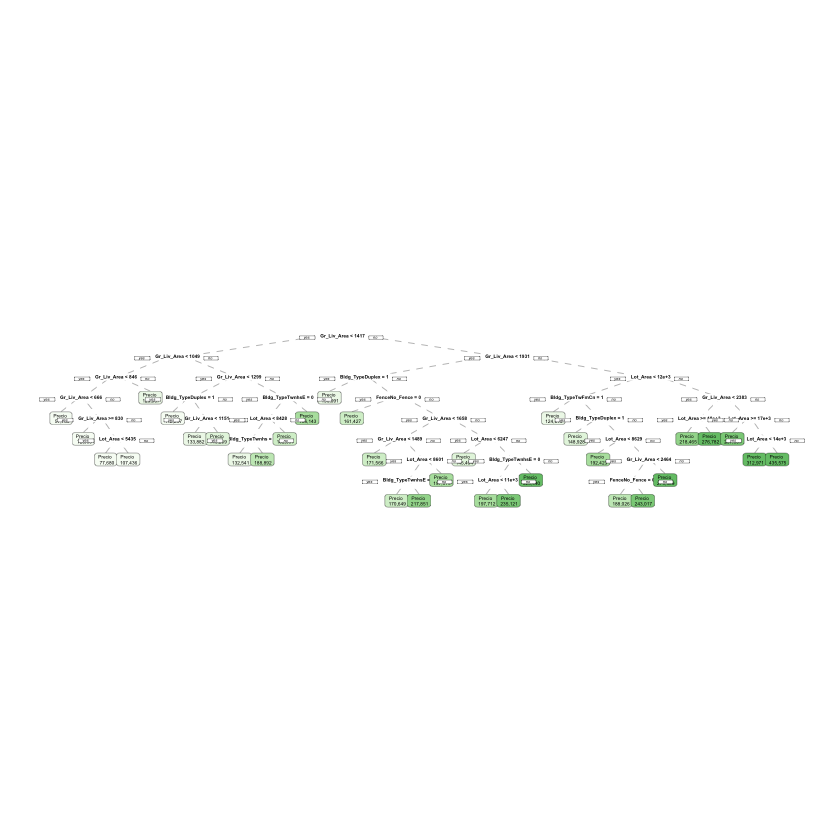

In [33]:
prp(tree_lenght$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_lenght$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

- Or the grid

In [34]:
set.seed(123)
tree_grid <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart",
    trControl = fitControl,
    tuneGrid = expand.grid(cp = seq(0.001707763, 0.001707765, length.out = 100))
)


In [35]:
tree_grid

CART 

2063 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1651, 1651, 1650, 1651, 1649 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared  MAE     
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.182453
  0.001707763  0.2513605  0.55202   0.1824

More details here: https://topepo.github.io/caret/train-models-by-tag.html#tree-based-model

##### Tidymodels

In [45]:
# Model setting
tree_model_tune_complex <- decision_tree(cost_complexity = tune()) %>% #Change here
  set_engine("rpart") %>% 
  set_mode("regression") 

# As before

tree_wf <- workflow() %>%
                     add_recipe(rec_1) %>%
                     add_model(tree_model_tune_complex)

tree_grid_complexity <- grid_regular(cost_complexity(),
                          levels = 5) #at least 100

#train
best_tree <- 
  tree_wf %>% 
  tune_grid(
    resamples = ames_folds,
    grid = tree_grid_complexity,
    metrics= metric_set( mae)      
    ) %>%
  select_best(metric = "mae")

best_tree


cost_complexity,.config
<dbl>,<chr>
0.0005623413,Preprocessor1_Model4


In [46]:


#End workflow
tree_wf %>% 
  finalize_workflow(best_tree)

== Workflow ====================================================================
Preprocessor: Recipe
Model: decision_tree()

-- Preprocessor ----------------------------------------------------------------
1 Recipe Step

* step_log()

-- Model -----------------------------------------------------------------------
Decision Tree Model Specification (regression)

Main Arguments:
  cost_complexity = 0.000562341325190349

Computational engine: rpart 


### Comentarios sobre Árboles


#### Pros: 
  
    - Los árboles son muy fáciles de explicar a las personas (probablemente incluso más fáciles que la regresión lineal) Los árboles se pueden trazar gráficamente y son fácilmente interpretados incluso por no expertos.

    - Variables más importantes en la parte superior



#### Cons:
    
    - Si la estructura es lineal, CART no funciona bien
    
<div >
<img src = "figures/tree_vs_reg.png" />
</div>


    - Los árboles no son muy robustos 
    

In [37]:
set.seed(123)
tree_rpart2_rob <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames[-c(1:20),],
    method = "rpart2",
    trControl = fitControl,
    tuneGrid = expand.grid(maxdepth = seq(1,30,1))
)

In [38]:
tree_rpart2_rob

CART 

2043 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1634, 1636, 1633, 1635, 1634 
Resampling results across tuning parameters:

  maxdepth  RMSE       Rsquared   MAE      
   1        0.3093770  0.3188655  0.2317362
   2        0.2936029  0.3872337  0.2172230
   3        0.2836288  0.4292888  0.2100289
   4        0.2804283  0.4416750  0.2071989
   5        0.2754844  0.4617727  0.2049167
   6        0.2720396  0.4746310  0.2022798
   7        0.2703747  0.4814416  0.2004039
   8        0.2685697  0.4885841  0.1984887
   9        0.2684559  0.4889455  0.1982535
  10        0.2684559  0.4889455  0.1982535
  11        0.2684559  0.4889455  0.1982535
  12        0.2684559  0.4889455  0.1982535
  13        0.2684559  0.4889455  0.1982535
  14        0.2684559  0.4889455  0.1982535
  15        0.2684559  0.4889455  0.1982535
  16        0.2684559  0.4889455  0.1982535
  17        0.2684559  0.4889455  0.1982535
  18        0.2

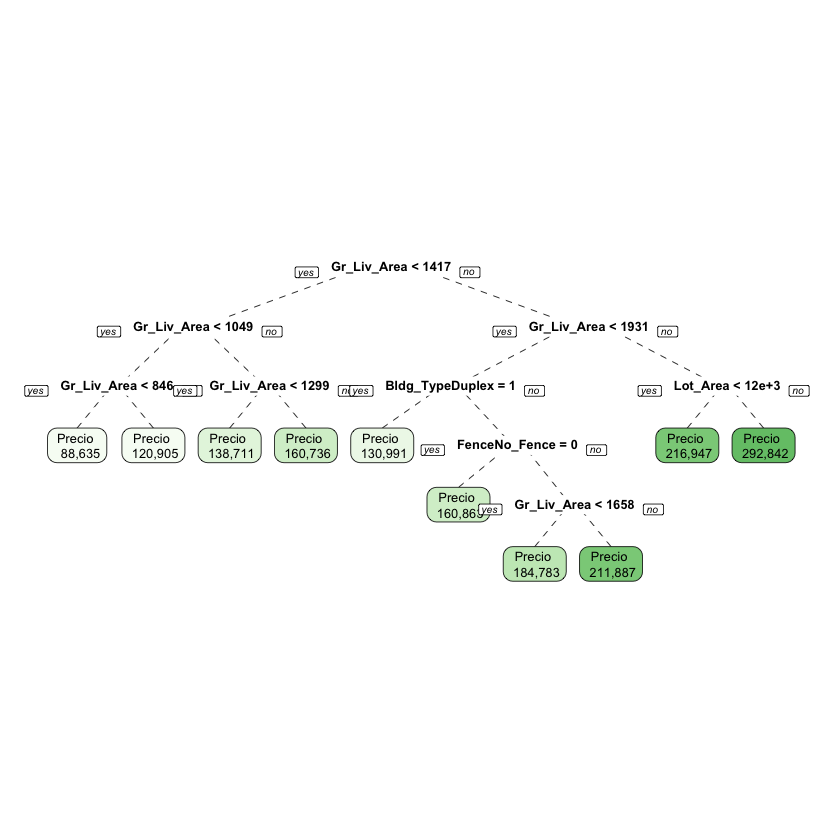

In [39]:
prp(tree_rpart2_rob$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_rpart2_rob$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

#### Change the sample

In [40]:
db_sample<- sample_frac(ames,size=1,replace=TRUE) #takes a sample with replacement of the same size of the original sample (1 or 100%)

In [41]:
set.seed(123)
tree_rpart2_rob_sample <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=db_sample,
    method = "rpart2",
    trControl = fitControl,
    tuneGrid = expand.grid(maxdepth = seq(1,30,1))
)

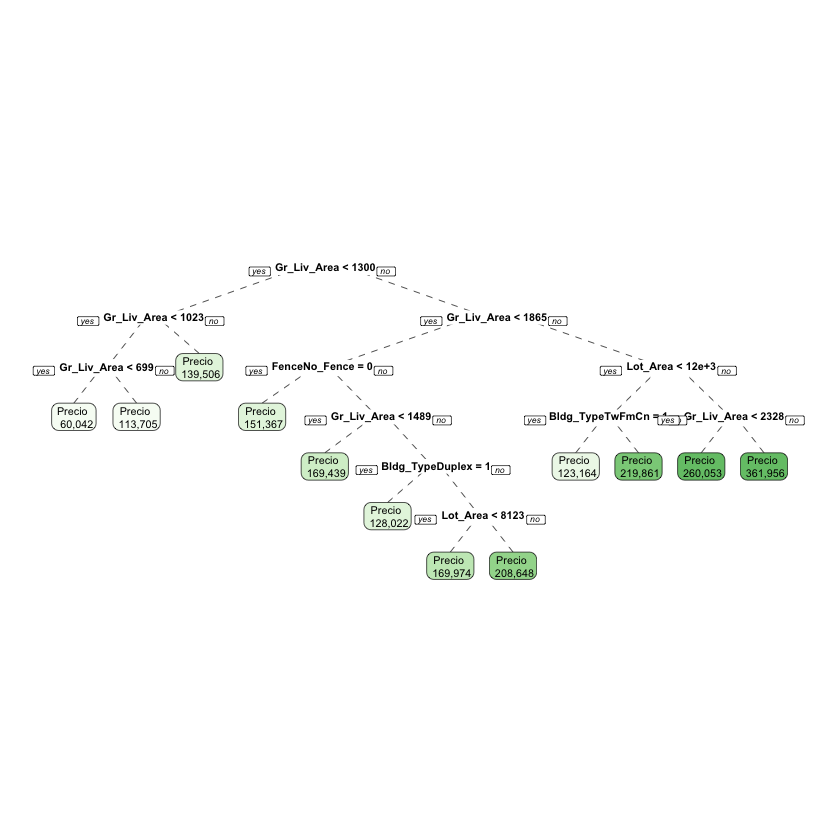

In [42]:
prp(tree_rpart2_rob_sample$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_rpart2_rob_sample$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))